<a href="https://colab.research.google.com/github/SrikanthGuggila/INeuron/blob/main/Black_Friday_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to paredict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

**Data**
1. Variable Definition
2. User_ID User ID
3. Product_ID Product ID
4. Gender Sex of User
5. Age Age in bins
6. Occupation Occupation (Masked)
7. City_Category Category of the City (A,B,C)
8. Stay_In_Current_City_Years Number of years stay in current city
9. Marital_Status Marital Status
10. Product_Category_1 Product Category (Masked)
11. Product_Category_2 Product may belongs to other category also (Masked)
12. Product_Category_3 Product may belongs to other category also (Masked)
13. Purchase Purchase Amount (Target Variable)

**Import Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url_train = 'https://raw.githubusercontent.com/iNeuronai/EDACollection/master/black_friday/blackFriday_train.csv'
train = pd.read_csv(url_train)
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
url_test = 'https://raw.githubusercontent.com/iNeuronai/EDACollection/master/black_friday/blackFriday_test.csv'
test = pd.read_csv(url_test)
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
train['Sex'] = train.Gender.map({'M':0,'F':1})

In [6]:
train[['Gender','Sex']].head()

,Gender,Sex
0,F,1
1,F,1
2,F,1
3,F,1
4,M,0


In [7]:
train = train.drop('Gender', axis=1)

In [8]:
test['Sex'] = test.Gender.map({'M':0,'F':1})

In [9]:
test[['Gender','Sex']].head()

,Gender,Sex
0,M,0
1,M,0
2,F,1
3,F,1
4,F,1


In [10]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [11]:
train.dtypes

User_ID                         int64
Product_ID                     object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
Sex                             int64
dtype: object

In [12]:
train['Age'] = train.Age.map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [13]:
test['Age'] = test.Age.map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [14]:
train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
city_getdummies_train = pd.get_dummies(train['City_Category'],prefix='City_Category').iloc[:,1:]
city_getdummies_test = pd.get_dummies(test['City_Category'],prefix='City_Category').iloc[:,1:]

In [16]:
train = pd.concat([train,city_getdummies_train],axis=1)

In [17]:
test = pd.concat([test,city_getdummies_test],axis=1)

In [18]:
train.drop('City_Category',axis =1, inplace=True)
test.drop('City_Category',axis =1, inplace=True)

In [19]:
train['Stay_In_Current_City_Years'] = train.Stay_In_Current_City_Years.str.replace('+','')
test['Stay_In_Current_City_Years'] = test.Stay_In_Current_City_Years.str.replace('+','')

In [20]:
train.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Sex,City_Category_B,City_Category_C
0,1000001,P00069042,1,10,2,0,3,NaN,NaN,8370,1,0,0
1,1000001,P00248942,1,10,2,0,1,6.0,14.0,15200,1,0,0
2,1000001,P00087842,1,10,2,0,12,NaN,NaN,1422,1,0,0
3,1000001,P00085442,1,10,2,0,12,14.0,NaN,1057,1,0,0
4,1000002,P00285442,7,16,4,0,8,NaN,NaN,7969,0,0,1


In [21]:
test.drop('Gender',axis=1,inplace=True)

In [22]:
test.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Sex,City_Category_B,City_Category_C
0,1000004,P00128942,5,7,2,1,1,11.0,NaN,0,1,0
1,1000009,P00113442,3,17,0,0,3,5.0,NaN,0,0,1
2,1000010,P00288442,4,1,4,1,5,14.0,NaN,1,1,0
3,1000010,P00145342,4,1,4,1,4,9.0,NaN,1,1,0
4,1000011,P00053842,3,1,1,0,4,5.0,12.0,1,0,1


In [23]:
train.rename(columns={'Stay_In_Current_City_Years':'YearsInCity','Product_Category_1':'Cat1','Product_Category_2':'Cat2','Product_Category_3':'Cat3'},inplace=True)
test.rename(columns={'Stay_In_Current_City_Years':'YearsInCity','Product_Category_1':'Cat1','Product_Category_2':'Cat2','Product_Category_3':'Cat3'},inplace=True)

In [24]:
train.rename(columns={'City_Category_B':'City_B'},inplace=True)
test.rename(columns={'City_Category_C':'City_C'},inplace=True)

In [25]:
train.shape

(550068, 13)

In [26]:
test.shape

(233599, 12)

In [27]:
train.columns

Index(['User_ID', 'Product_ID', 'Age', 'Occupation', 'YearsInCity',
       'Marital_Status', 'Cat1', 'Cat2', 'Cat3', 'Purchase', 'Sex', 'City_B',
       'City_Category_C'],
      dtype='object')

In [28]:
test.columns

Index(['User_ID', 'Product_ID', 'Age', 'Occupation', 'YearsInCity',
       'Marital_Status', 'Cat1', 'Cat2', 'Cat3', 'Sex', 'City_Category_B',
       'City_C'],
      dtype='object')

In [29]:
train.rename(columns={'City_Category_C':'City_C'},inplace=True)
test.rename(columns={'City_Category_B':'City_B'},inplace=True)

In [30]:
data = train.append(test, sort=False)
data.shape

(783667, 13)

In [31]:
data['Cat2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [32]:
data['Cat3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [33]:
data['Cat2'] = data['Cat2'].fillna(data['Cat2'].mode()[0])
data['Cat3'] = data['Cat3'].fillna(data['Cat3'].mode()[0])

In [34]:
data['Purchase'] = data['Purchase'].fillna(data['Purchase'].mean())

In [35]:
data.head()

,User_ID,Product_ID,Age,Occupation,YearsInCity,Marital_Status,Cat1,Cat2,Cat3,Purchase,Sex,City_B,City_C
0,1000001,P00069042,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,1000001,P00248942,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,1000001,P00087842,1,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,1000001,P00085442,1,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,1000002,P00285442,7,16,4,0,8,8.0,16.0,7969.0,0,0,1


In [36]:
data1 = data.copy()

In [37]:
data1.drop(columns=['User_ID','Product_ID'],inplace=True)

In [38]:
data1.head()

,Age,Occupation,YearsInCity,Marital_Status,Cat1,Cat2,Cat3,Purchase,Sex,City_B,City_C
0,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,1,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,1,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,7,16,4,0,8,8.0,16.0,7969.0,0,0,1


In [39]:
data1.describe()

,Age,Occupation,Marital_Status,Cat1,Cat2,Cat3,Purchase,Sex,City_B,City_C
count,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.00000,783667.000000,783667.000000
mean,3.496802,8.079300,0.409777,5.366196,9.265541,14.988858,9263.968713,0.24709,0.420764,0.310954
std,1.352736,6.522206,0.491793,3.878160,4.301427,2.740792,4208.342958,0.43132,0.493682,0.462884
min,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.00000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,1.000000,8.000000,16.000000,6996.000000,0.00000,0.000000,0.000000
50%,3.000000,7.000000,0.000000,5.000000,8.000000,16.000000,9263.968713,0.00000,0.000000,0.000000
75%,4.000000,14.000000,1.000000,8.000000,14.000000,16.000000,9927.000000,0.00000,1.000000,1.000000
max,7.000000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.00000,1.000000,1.000000


In [40]:
import seaborn as sns

In [41]:
data1['Purchase'].mean()

9263.96871291369

In [42]:
data1['Age'].value_counts()

3    313015
4    156724
2    141953
5     65278
6     54784
7     30579
1     21334
Name: Age, dtype: int64

In [43]:
data1['Marital_Status'].value_counts()

0    462538
1    321129
Name: Marital_Status, dtype: int64

In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             783667 non-null  int64  
 1   Occupation      783667 non-null  int64  
 2   YearsInCity     783667 non-null  object 
 3   Marital_Status  783667 non-null  int64  
 4   Cat1            783667 non-null  int64  
 5   Cat2            783667 non-null  float64
 6   Cat3            783667 non-null  float64
 7   Purchase        783667 non-null  float64
 8   Sex             783667 non-null  int64  
 9   City_B          783667 non-null  uint8  
 10  City_C          783667 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 61.3+ MB


In [45]:
data1['YearsInCity'] = data1['YearsInCity'].astype(int)
data1['City_B'] = data1['City_B'].astype(int)
data1['City_C'] = data1['City_C'].astype(int)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


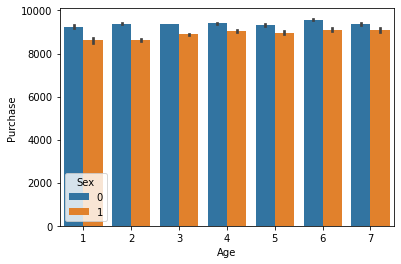

In [46]:
sns.barplot('Age','Purchase',hue='Sex',data=data1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


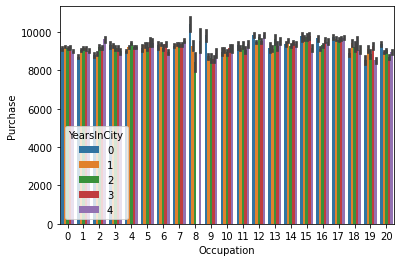

In [47]:
sns.barplot('Occupation','Purchase',hue='YearsInCity',data=data1)

In [48]:
data1.head()

,Age,Occupation,YearsInCity,Marital_Status,Cat1,Cat2,Cat3,Purchase,Sex,City_B,City_C
0,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,1,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,1,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,7,16,4,0,8,8.0,16.0,7969.0,0,0,1


In [76]:
x = data1.drop('Purchase',axis=1)
y = data1['Purchase']

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

In [79]:
x_scaled

array([[ 0.37074938, -1.24016303, -0.66589309, ..., -0.57326321,
        -0.8519193 , -0.67175939],
       [-0.36808951, -1.24016303, -0.66589309, ..., -0.57326321,
        -0.8519193 ,  1.48862825],
       [-1.10692841, -1.24016303, -0.66589309, ..., -0.57326321,
        -0.8519193 ,  1.48862825],
       ...,
       [-0.36808951,  0.1394396 ,  1.66223786, ...,  1.7443994 ,
         1.1738201 , -0.67175939],
       [-0.36808951, -1.24016303, -0.66589309, ..., -0.57326321,
        -0.8519193 ,  1.48862825],
       [-0.36808951, -0.62700631, -0.66589309, ...,  1.7443994 ,
         1.1738201 , -0.67175939]])

In [80]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [81]:
xgb.fit(x_train,y_train)

[16:26:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
y_predict_train = xgb.predict(x_train)
y_predict_train[0:5]

array([7079.1177, 7225.776 , 7236.4976, 7983.2476, 9545.765 ],
      dtype=float32)

In [84]:
y_train[0:5]

382359    8884.000000
179106    3485.000000
431546    8666.000000
32771     9263.968713
72237     9263.968713
Name: Purchase, dtype: float64

In [85]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [86]:
y_predict_train_dt = dt.predict(x_train) 

In [89]:
dt.score(x_train,y_train)

0.6331528295343472

In [75]:
y_train

382359     8884.000000
179106     3485.000000
431546     8666.000000
32771      9263.968713
72237      9263.968713
              ...     
371403     5925.000000
491263    15231.000000
470924     5235.000000
491755     7146.000000
128037     6034.000000
Name: Purchase, Length: 626933, dtype: float64